In [9]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import numpy as np
import matplotlib.pyplot as plt
from Bio import Phylo
from io import StringIO
from Bio import AlignIO

This lab is an exercise in using MUSCLE (Bob Edgar) to produce a multiple sequence alignment and using FastTree (Morgan Price) to produce a phylogenetic tree from the MSA.  The pre-processing of the Newick tree involves the following terminal commands:



```muscle -in seqs.fa -out seqs.aligned.fa
fasttree -nt < seqs.aligned.fa > tree.nwk```

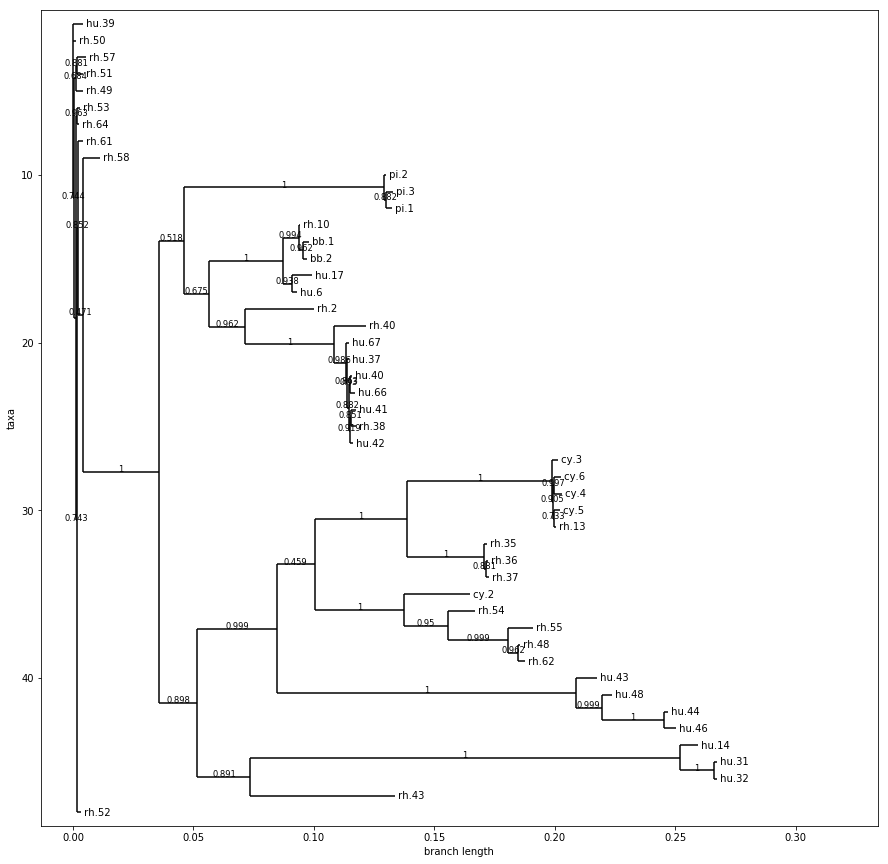

In [57]:
tree = Phylo.read('tree.nwk', 'newick')
Phylo.draw(tree)
plt.rcParams['figure.figsize'] = [35, 35]

We see in this tree that they are clear groupings of species, such as the cy.3, 4, 5, and 6 branch, and the hu.37, 67, 40, 66, 41, etc. branch.  We see that pi and rh groups are more distant from hu and cy families on these branches.
We now use SeqIO to select individual sequences from each distinct branch for BLAST analysis.

In [11]:
record_dict = SeqIO.index('seqs.fa', 'fasta')
print(record_dict['cy.3'])
print(record_dict['rh.36'])
print(record_dict['hu.44'])
print(record_dict['pi.3'])

ID: cy.3
Name: cy.3
Description: cy.3
Number of features: 0
Seq('atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet())
ID: rh.36
Name: rh.36
Description: rh.36
Number of features: 0
Seq('atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet())
ID: hu.44
Name: hu.44
Description: hu.44
Number of features: 0
Seq('atggctgccgatggttatcttccagattggctcgaggacactctctctgaagga...taa', SingleLetterAlphabet())
ID: pi.3
Name: pi.3
Description: pi.3
Number of features: 0
Seq('atggctgctgacggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet())


In [12]:
print(record_dict['bb.2'].seq)

atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggcgctgaaacctggagccccgaagcccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataaccacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagaccggtagagccatcaccccagcgttctccagactcctctacgggcatcggcaagaaaggccagcagcccgcgaaaaagagactcaactttgggcagactggcgactcagagtcagtgcccgaccctcaaccaatcggagaaccccccgcaggcccctctggtctgggatctggtacaatggctgcaggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtgggtagttcctcaggaaattggcattgcgattccacatggctgggcgacggagtcatcaccaccagcacccgaacctgggccctccccacctacaacaaccacctctacaagcaaatctccaacgggacttcgggaggaagcaccaacgacaacacctacttcggctacagcaccccctgggggtattttgactttaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccaagagcctcaacttcaagctcttcaacatccaggtcaaggaggtcacgcagaatgaaggcaccaaga

For cy.3 we mainly see matches with the non-human primate AAVcy capsid protein VP1 genes, as well as some hits to AAVrh VP1.

For rh.36 we mainly see matches with AAVrh VP1 genes, with some hits to AAVcy VP1 genes.

For hu.44 we now see adeno-associated (likely human) AAVhu VP1 genes, but fewer cy and rh hits.

For pi.3 we see the closest hits with AAVpi VP1 genes, then rh genes, which is consistent with our tree.

From my selection, I did not see any that did not necessarily match the others, we generally do not trust annotations from BLAST sequences due to partial homologies in large sequences causing high E-values and identity matches with other genes.

In [13]:
align = AlignIO.read('seqs.aligned.fa', 'fasta')

In [14]:
print(align)

SingleLetterAlphabet() alignment with 48 rows and 2238 columns
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.14
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.31
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.32
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.44
ATGGCTGCCGACGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.46
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.43
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.48
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.3
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.1
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.2
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.43
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.58
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.57
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.39
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.49
ATGGTTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.51
ATGGCTGCCGATGGTTATCTTCCAGATT

In [28]:
cluster_1 = align[:]
print(cluster_1)

SingleLetterAlphabet() alignment with 48 rows and 2238 columns
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.14
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.31
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.32
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.44
ATGGCTGCCGACGGTTATCTTCCAGATTGGCTCGAGGACACTCT...TAA hu.46
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.43
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.48
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.3
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.1
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA pi.2
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.43
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.58
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.57
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.39
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.49
ATGGTTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.51
ATGGCTGCCGATGGTTATCTTCCAGATT

In [16]:
from Bio import SeqUtils

In [58]:
GC_content = []
ln = len(cluster_1[:, 0]) 
for i in range(ln):
    GC_content.append(SeqUtils.GC(cluster_1[:, i]) / 100)
GC_content = np.array(GC_content)
print(GC_content)

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
[0.         0.         1.         1.         0.97916667 0.
 1.         1.         0.66666667 1.         0.         0.35416667
 1.         1.         0.         0.         0.         0.
 1.         0.         0.         1.         1.         0.
 1.         0.         0.         0.         1.         1.
 1.         0.         0.97916667 1.         0.         1.
 1.         0.02083333 1.         0.         0.08333333 0.91666667
 1.         0.         0.97916667 0.         1.         0.        ]


In [41]:
AT_content =  1 - GC_content
print(AT_content)

[1.         1.         0.         0.         0.02083333 1.
 0.         0.         0.33333333 0.         1.         0.64583333
 0.         0.         1.         1.         1.         1.
 0.         1.         1.         0.         0.         1.
 0.         1.         1.         1.         0.         0.
 0.         1.         0.02083333 0.         1.         0.
 0.         0.97916667 0.         1.         0.91666667 0.08333333
 0.         1.         0.02083333 1.         0.         1.        ]


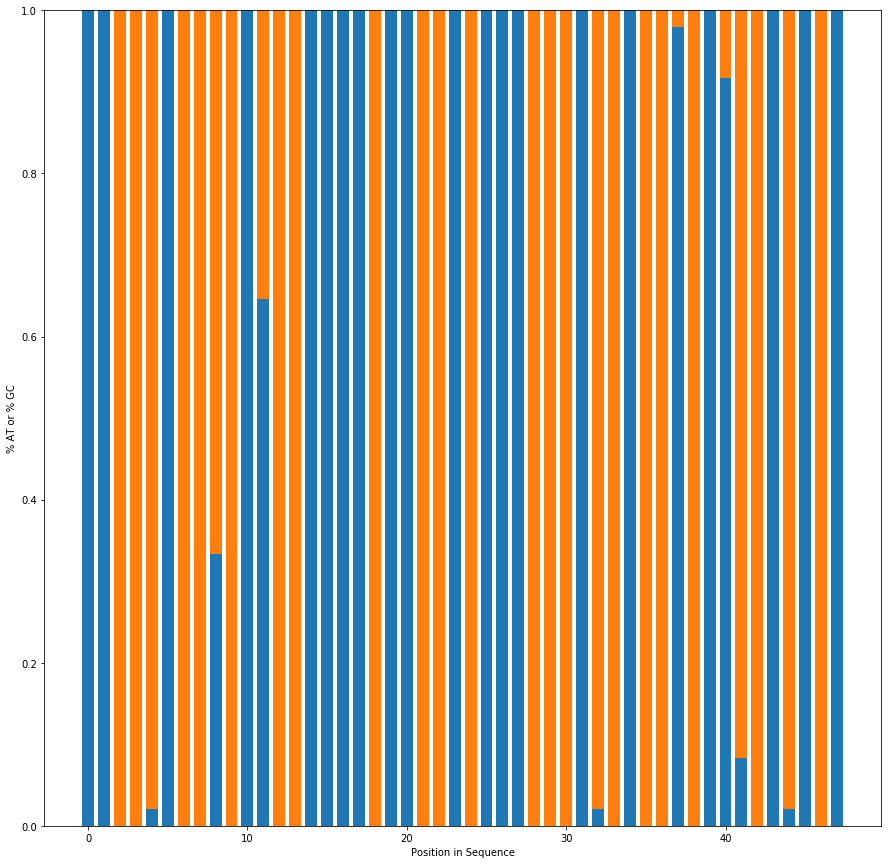

In [42]:
plt.bar(range(len(AT_content)), AT_content, 0.75)
plt.bar(range(len(GC_content)), GC_content, 0.75, bottom=AT_content)
plt.xlabel("Position in Sequence")
plt.ylabel("% AT or % GC")
plt.show()

In [67]:
cluster2 = cluster_1[:12]
cluster3 = cluster_1[12:24]
cluster4 = cluster_1[24:36]
cluster5 = cluster_1[36:48]

cluster_2 = []
for i in range(12):
    cluster_2.append(cluster2[i].seq)

cluster_3 = []
for i in range(12):
    cluster_3.append(cluster3[i].seq)
    
cluster_4 = []
for i in range(12):
    cluster_4.append(cluster4[i].seq)
    
cluster_5 = []
for i in range(12):
    cluster_5.append(cluster5[i].seq)

data = [cluster_2, cluster_3, cluster_4, cluster_5]

print(data) 

# ok I'm having an aneurysm trying to make this boxplot sorry

[[Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTTAGTGAAGGA...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCCGACGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGA...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet()), Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', 